In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

In [2]:
unpickled_df_train = pd.read_pickle("rm_dataset.pkl")
unpickled_df_target = pd.read_pickle('rm_outputs.pkl')


In [3]:
unpickled_df_train.shape

(3492, 25)

In [4]:
unpickled_df_target.shape

(3492,)

In [5]:
Features_list = []
for i in range(1,26):
    Features_list.append('F'+str(i))
Features_list

['F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'F6',
 'F7',
 'F8',
 'F9',
 'F10',
 'F11',
 'F12',
 'F13',
 'F14',
 'F15',
 'F16',
 'F17',
 'F18',
 'F19',
 'F20',
 'F21',
 'F22',
 'F23',
 'F24',
 'F25']

In [6]:
train = pd.DataFrame(unpickled_df_train,columns=Features_list)
train

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25
0,0.679287,0.586676,0.318870,0.998015,0.831617,0.650619,0.526182,0.998482,0.0,0.0,...,0.0,0.966727,0.046854,0.026602,0.129407,0.029883,0.125622,0.103901,0.000039,0.008056
1,0.270734,0.929841,0.265246,0.989302,0.830693,0.650965,0.532885,0.997236,0.0,0.0,...,0.0,0.951559,0.007376,0.015310,0.115595,0.041447,0.042810,0.101157,0.000029,0.021819
2,0.515157,0.817152,0.275267,0.987000,0.830377,0.651083,0.531674,0.998727,0.0,0.0,...,0.0,0.925072,0.011476,0.014490,0.116276,0.062885,0.045708,0.150693,0.000031,0.023498
3,0.351636,0.493667,0.234698,0.982645,0.800550,0.649161,0.513294,0.999205,0.0,0.0,...,0.0,0.912246,0.011690,0.013189,0.119930,0.058941,0.043520,0.147210,0.000034,0.024841
4,0.364262,0.515181,0.244396,0.982472,0.821264,0.648845,0.526552,0.997682,0.0,0.0,...,0.0,0.896863,0.008312,0.014236,0.121396,0.052642,0.046046,0.134116,0.000027,0.026519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3487,0.447559,0.620282,0.178009,0.951780,0.818719,0.648998,0.529919,0.997395,0.0,0.0,...,0.0,0.778091,0.025032,0.031701,0.133407,0.086413,0.035028,0.137170,0.000031,0.013938
3488,0.443869,0.569201,0.156685,0.951638,0.819871,0.649152,0.548040,0.997365,0.0,0.0,...,0.0,0.683005,0.057651,0.050352,0.129793,0.103464,0.035741,0.146197,0.000017,0.002566
3489,0.396507,0.551073,0.201454,0.963106,0.819809,0.649331,0.484938,0.998041,0.0,0.0,...,0.0,0.854426,0.012550,0.021026,0.118970,0.059379,0.044820,0.120004,0.000028,0.031554
3490,0.450358,0.584404,0.192191,0.963425,0.818252,0.648070,0.516833,0.997512,0.0,0.0,...,0.0,0.661956,0.064235,0.048279,0.131931,0.065080,0.043333,0.152809,0.000014,0.003360


In [7]:
target = pd.DataFrame(unpickled_df_target,columns=['Target'])
target

,Target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
3487,5.0
3488,5.0
3489,5.0
3490,5.0


# Using Genetic Programming

In [8]:
import genetic


In [9]:
data_inputs = unpickled_df_train # Training Dataset in numpy format
data_outputs = unpickled_df_target # Target values in numpy format

num_samples = data_inputs.shape[0] # Number of tuples/records
num_feature_elements = data_inputs.shape[1] # Number of features

train_indices = np.arange(1, num_samples, 4)
test_indices = np.arange(0, num_samples, 4)
print("Number of training samples: ", train_indices.shape[0])
print("Number of test samples: ", test_indices.shape[0])

Number of training samples:  873
Number of test samples:  873


In [10]:
sol_per_pop = 8 # Population size.
num_parents_mating = 4 # Number of parents inside the mating pool.
num_mutations = 3 # Number of elements to mutate.
# Defining the population shape.
pop_shape = (sol_per_pop, num_feature_elements)
 
# Creating the initial population.
new_population = np.random.randint(low=0, high=2, size=pop_shape)
print(new_population.shape)
 
best_outputs = []
num_generations = 100

(8, 25)


# Process 

Generation :  0
Best result :  0.9140893470790378
Generation :  1
Best result :  0.9369988545246277
Generation :  2
Best result :  0.9392898052691867
Generation :  3
Best result :  0.9427262313860252
Generation :  4
Best result :  0.9484536082474226
Generation :  5
Best result :  0.9450171821305842
Generation :  6
Best result :  0.9427262313860252
Generation :  7
Best result :  0.9415807560137457
Generation :  8
Best result :  0.9369988545246277
Generation :  9
Best result :  0.9415807560137457
Generation :  10
Best result :  0.9427262313860252
Generation :  11
Best result :  0.9450171821305842
Generation :  12
Best result :  0.9507445589919816
Generation :  13
Best result :  0.9438717067583047
Generation :  14
Best result :  0.9438717067583047
Generation :  15
Best result :  0.9530355097365406
Generation :  16
Best result :  0.9507445589919816
Generation :  17
Best result :  0.9518900343642611
Generation :  18
Best result :  0.9484536082474226
Generation :  19
Best result :  0.9495990

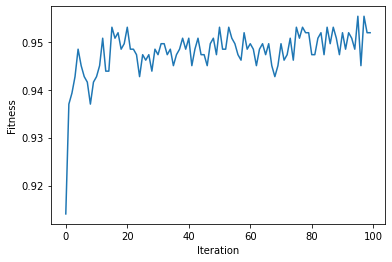

In [11]:
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.
    fitness = genetic.cal_pop_fitness(new_population, data_inputs, data_outputs, train_indices, test_indices)
    
    best_outputs.append(np.max(fitness))
    # The best result in the current iteration.
    print("Best result : ", best_outputs[-1])

    # Selecting the best parents in the population for mating.
    parents = genetic.select_mating_pool(new_population, fitness, num_parents_mating)

    # Generating next generation using crossover.
    offspring_crossover = genetic.crossover(parents, offspring_size=(pop_shape[0]-parents.shape[0], num_feature_elements))

    # Adding some variations to the offspring using mutation.
    offspring_mutation = genetic.mutation(offspring_crossover, num_mutations=num_mutations)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    
fitness = genetic.cal_pop_fitness(new_population, data_inputs, data_outputs, train_indices, test_indices)
best_match_idx = np.where(fitness == np.max(fitness))[0]
best_match_idx = best_match_idx[0]
best_solution = new_population[best_match_idx, :]
best_solution_indices = np.where(best_solution == 1)[0]
best_solution_num_elements = best_solution_indices.shape[0]
best_solution_fitness = fitness[best_match_idx]

print("best_match_idx : ", best_match_idx)
print("best_solution : ", best_solution)
print("Selected indices : ", best_solution_indices)
print("Number of selected elements : ", best_solution_num_elements)
print("Best solution fitness : ", best_solution_fitness)

matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()